# ***Student Perfromance Dataset / Classification***

*Imports*

In [1]:
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

*Functions*

In [2]:
# Fucntion to convert scores to grades
def get_grade(score): 
    if score <= 9:
        grade = 0 #F
    elif 10<=score<=11:
        grade = 1 #D
    elif 12<=score<=13:
        grade = 2 #C
    elif 14<=score<=15:
        grade = 3 #B
    elif score>=16:
        grade = 4 #A
    
    return grade

# Trivial classifier - randomly outputs class labels with probability based on class priors
def trivial_classifier(Y_train, data):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    weights = [np.count_nonzero(y_grades_train == 0)/len(Y_train)*100, np.count_nonzero(y_grades_train == 1)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 2)/len(Y_train)*100, np.count_nonzero(y_grades_train == 3)/len(Y_train)*100,
    np.count_nonzero(y_grades_train == 4)/len(Y_train)*100]
    y_pred = list()
    for i in range(len(data)):
        pred_class = 0
        for j in range(10):
            gradelist = [0, 1, 2, 3, 4]
            pred_class += random.choices(gradelist, weights=weights)[0]
        y_pred.append(round(pred_class/10))
    return np.array(y_pred)

# Baseline Model - Nearest Means Classifier
def nearestMeansClassifier(X_train, Y_train, X_test):
    y_grades_train = list()
    for i in range(len(Y_train)):
        y_grades_train.append(get_grade(Y_train[i]))
    y_grades_train = np.array(y_grades_train)
    clf = NearestCentroid()
    clf.fit(X_train, y_grades_train)
    Y_test_grades_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        Y_test_grades_pred[i] = clf.predict(X_test[i].reshape(1, -1))
    
    return Y_test_grades_pred

# Performance Measures
def get_performance(y, y_pred):
    macro_f1_score = f1_score(y, y_pred, average = 'macro')
    print("The macro F1 score for the classifier is - ", macro_f1_score)
    accuracy = f1_score(y, y_pred, average = 'micro')
    print("The accuracy for the classifier is - ", accuracy)
    cf_matrix = confusion_matrix(y, y_pred)
    labels = ['F', 'D', 'C', 'B', 'A']
    ax = sns.heatmap(cf_matrix, annot=True)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()
        

In [38]:
def KNNClassifier(X, y, X_test, Y_test_actual):
    params = {  
                'n_neighbors'   :       [2,3,4,5],
                'algorithm'     :       ['ball_tree', 'kd_tree', 'brute', 'auto'],
                'leaf_size'     :       [ 10, 20, 30, 40, 50],
                'weights'       :       ['uniform', 'distance']
            } 
    neigh = KNeighborsClassifier()
    clf = GridSearchCV(estimator=neigh, param_grid=params, cv=5)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    #print('\n')
    y_train_pred = clf.predict(X)
    accuracy = f1_score(y, y_train_pred, average = 'micro')
    print('Cross Validation Best Score', accuracy)
    print('\n')
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

def LogitClassifier(X, y, X_test, Y_test_actual):
    params= {
                'tol'   :   [1e-5, 0.5*1e-4, 1e-4, 2*1e-4, 1e-3],
                'solver':   ['newton-cg', 'lbfgs', 'liblinear']
            }
    logreg = LogisticRegression(max_iter=100000)
    clf = GridSearchCV(estimator=logreg, param_grid=params, cv=5)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    y_train_pred = clf.predict(X)
    accuracy = f1_score(y, y_train_pred, average = 'micro')
    print('Cross Validation Best Score', accuracy)
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

def KernelSVMClassifier(X, y, X_test, Y_test_actual):
    params= {
                'C'             :   [0.8, 0.9, 1.0, 1.1, 1.2],
                'kernel'        :   ['linear', 'poly', 'rbf', 'sigmoid'],
                'tol'           :   [1e-5, 1e-4, 1e-3],
                'gamma'         :   ['scale', 'auto'],
                'class_weight'  :   ['balanced', None]
            }
    svc = SVC()
    clf = GridSearchCV(estimator=svc, param_grid=params, cv=5)
    clf.fit(X, y)
    print('Best parameters from Cross Validation: ', clf.best_params_)
    y_train_pred = clf.predict(X)
    accuracy = f1_score(y, y_train_pred, average = 'micro')
    print('Cross Validation Best Score', accuracy)
    Y_test_grades_pred = clf.predict(X_test)
    get_performance(Y_test_actual, Y_test_grades_pred)

def MLPerceptromClassifier(X, y, X_test, Y_test_actual):
    pass

Read in the data

In [21]:
train_df = pd.read_csv('data/student_performance_train.csv')
#dataset_train = train_df.to_numpy()

In [22]:
train_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## **Problem 1**
- Predict first-period academic performance without any prior academic performance data: remove the G2 and G3 columns from the original dataset, then predict G1.

Removing categorical non-binary features and grades. 

In [23]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

In [24]:
y_train = train_df.loc[:, train_df.columns.isin(['G1'])] 
Y_train = y_train['G1'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [25]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()

In [26]:
y_test = test_df.loc[:, test_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_test
Y_test = y_test['G1'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.1605864320938291
The accuracy for the classifier is -  0.26380368098159507


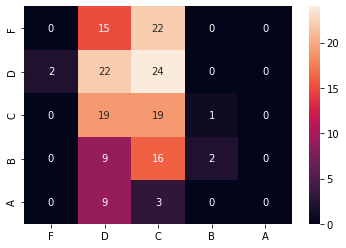

In [27]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.2339098179522256
The accuracy for the classifier is -  0.245398773006135


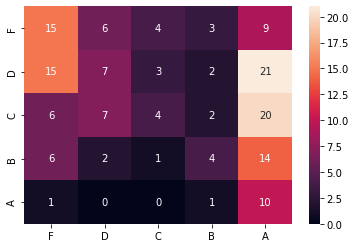

In [28]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

Normalizing Data and encoding categorical data

In [29]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [30]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Cross Validation Best Score 0.5390946502057613


The macro F1 score for the classifier is -  0.2555260509888779
The accuracy for the classifier is -  0.3312883435582822


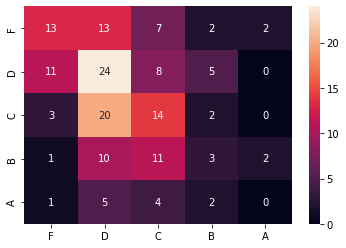

In [31]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**


Best parameters from Cross Validation:  {'solver': 'liblinear', 'tol': 1e-05}
Cross Validation Best Score 0.5
The macro F1 score for the classifier is -  0.2662989050348655
The accuracy for the classifier is -  0.31901840490797545


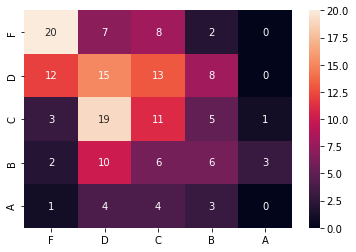

In [34]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**


Best parameters from Cross Validation:  {'C': 1.2, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 1e-05}
Cross Validation Best Score 0.8086419753086419
The macro F1 score for the classifier is -  0.29536184623102973
The accuracy for the classifier is -  0.3803680981595092


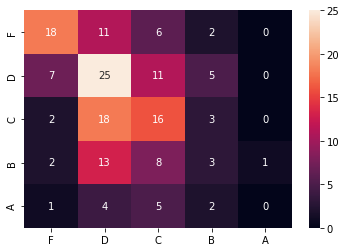

In [39]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi Layer Perceptron**

In [121]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the classifier is -  1.0
The accuracy for the classifier is -  1.0


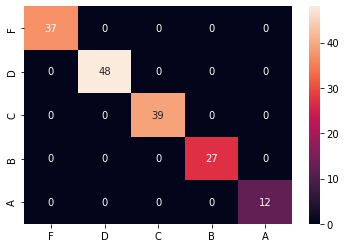

In [122]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

## **Problem 2**
- Predict final-period academic performance without any prior academic performance data: remove the G1 and G2 columns from the original dataset, then predict G3.

Removing categorical non-binary features and grades. 

In [40]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [41]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.1588888888888889
The accuracy for the classifier is -  0.26993865030674846


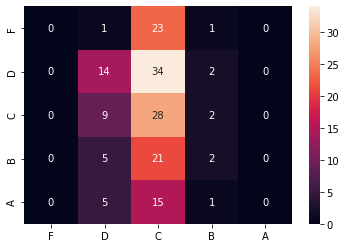

In [42]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.25040487766154157
The accuracy for the classifier is -  0.26380368098159507


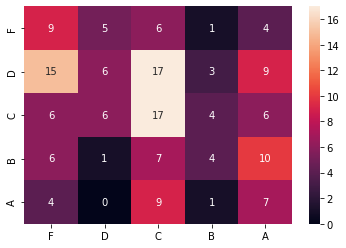

In [43]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'uniform'}
Cross Validation Best Score 0.6049382716049383


The macro F1 score for the classifier is -  0.3245536127709303
The accuracy for the classifier is -  0.3619631901840491


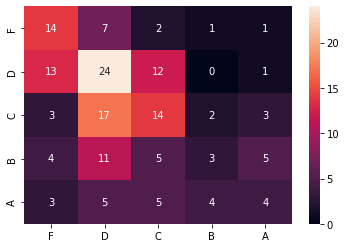

In [44]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**

Best parameters from Cross Validation:  {'solver': 'liblinear', 'tol': 1e-05}
Cross Validation Best Score 0.5102880658436214
The macro F1 score for the classifier is -  0.3159904678197361
The accuracy for the classifier is -  0.3374233128834356


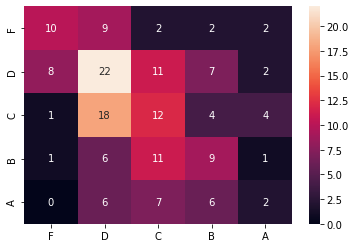

In [45]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**


Best parameters from Cross Validation:  {'C': 1.0, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'tol': 1e-05}
Cross Validation Best Score 0.8065843621399177
The macro F1 score for the classifier is -  0.3444695272837712
The accuracy for the classifier is -  0.3496932515337423


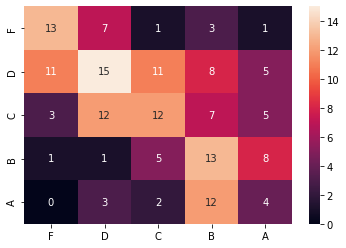

In [46]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi Layer Perceptron**

In [31]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  1.0
The accuracy for the trivial classifier is -  1.0


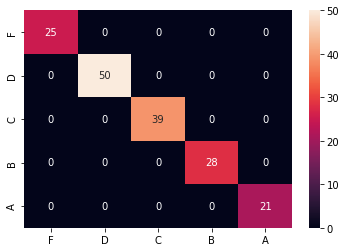

In [32]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)

## **Problem 3**
- Predict final academic performance using all available prior academic performance data: Keep G1 and G2 columns inside the dataset as features, then predict G3.

Removing categorical non-binary features.

In [47]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_train = train_df.loc[:, train_df.columns.isin(['G3'])] #Getting corresponding labels
Y_train = y_train['G3'].to_numpy()
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

Reading in test data and processing it

In [48]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy() #Converting to numpy array for easier processing

y_test = test_df.loc[:, test_df.columns.isin(['G3'])] #Getting corresponding labels
Y_test = y_test['G3'].to_numpy()
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

### **Trivial System**

The macro F1 score for the classifier is -  0.1307313660122649
The accuracy for the classifier is -  0.245398773006135


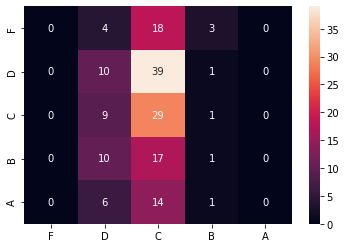

In [49]:
Y_test_grades_pred = trivial_classifier(Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred) 

### **Reference System - Nearest Means**

The macro F1 score for the classifier is -  0.6150584274113686
The accuracy for the classifier is -  0.6012269938650306


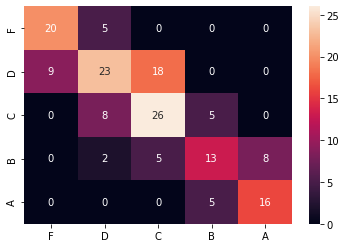

In [50]:
Y_test_grades_pred = nearestMeansClassifier(X_train, Y_train, X_test)
get_performance(Y_test_grades_actual, Y_test_grades_pred)

Normalizing data and encoding categorical data

In [51]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [52]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = test_df.loc[:, ~test_df.columns.isin(['G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

### **Approach 1: K Nearest Neighbors**

Best parameters from Cross Validation:  {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
Cross Validation Best Score 0.6069958847736625


The macro F1 score for the classifier is -  0.3943313305498517
The accuracy for the classifier is -  0.4049079754601227


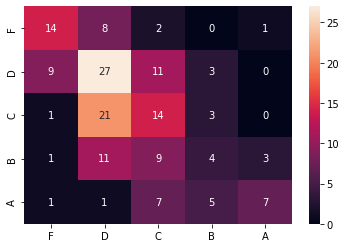

In [53]:
KNNClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Aproach 2 - Logistic Regression**

Best parameters from Cross Validation:  {'solver': 'newton-cg', 'tol': 1e-05}
Cross Validation Best Score 0.8045267489711934
The macro F1 score for the classifier is -  0.7222694026818367
The accuracy for the classifier is -  0.7361963190184049


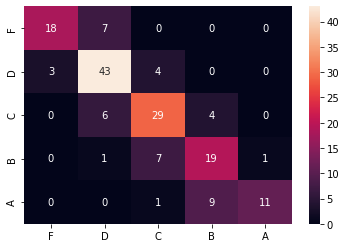

In [54]:
LogitClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 3 - Kernel Support Vector Machine**


Best parameters from Cross Validation:  {'C': 1.2, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear', 'tol': 1e-05}
Cross Validation Best Score 0.8559670781893005
The macro F1 score for the classifier is -  0.707249254649567
The accuracy for the classifier is -  0.7239263803680982


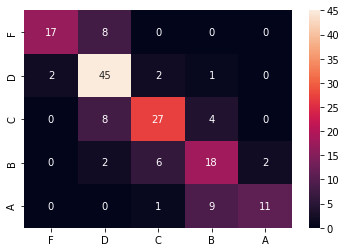

In [55]:
KernelSVMClassifier(X_train_scaled, y_grades_train, X_test_scaled, y_grades_test_actual)

### **Approach 4 - Multi Layer Perceptron**

In [45]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train_scaled, y_grades_train)
Y_test_grades_pred = clf.predict(X_test_scaled)

The macro F1 score for the trivial classifier is -  1.0
The accuracy for the trivial classifier is -  1.0


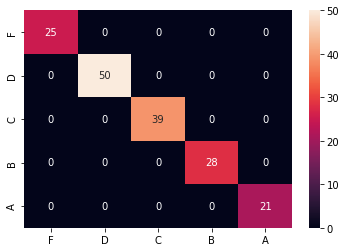

In [46]:
get_performance(Y_test_grades_actual, Y_test_grades_pred)